In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [23]:
df = pd.read_csv("table_sample/sentinel.csv")  

In [24]:
df

,Classname,Classvalue,brightness,br_ratio,gr_ration,min_rgb,max_rgb,ndvi,ndi_rb,range_rgb,whiteness2
0,Non_cloud,1,1458,0.82933,0.93679,1312,1582,0.203223,0.093297,270,540
1,Non_cloud,1,1385,0.99404,1.10358,1334,1481,0.385109,0.002990,147,294
2,Non_cloud,1,1372,1.00534,1.13501,1311,1488,0.516147,-0.002663,177,354
3,Non_cloud,1,1508,0.98840,1.09823,1449,1610,0.059654,0.005832,161,322
4,Non_cloud,1,1352,1.02512,1.15856,1274,1476,0.499607,-0.012403,202,404
...,...,...,...,...,...,...,...,...,...,...,...
503,Cloud,2,10856,1.05485,1.00376,10648,11232,-0.027006,-0.026691,584,1168
504,Cloud,2,9208,0.99140,0.97764,9096,9304,-0.009165,0.004318,208,416
505,Cloud,2,5968,1.26935,1.12671,5272,6692,0.030971,-0.118689,1420,2840
506,Cloud,2,11784,1.05052,1.00761,11560,12144,-0.004868,-0.024637,584,1168


In [25]:
features = [
    'brightness', 'br_ratio', 'gr_ration', 
    'min_rgb', 'max_rgb', 'ndvi',
    'ndi_rb', 'range_rgb', 'whiteness2'
]
X = df[features]
y = df['Classvalue']  # nhãn: 1 = Non-cloud, 2 = Cloud


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [28]:
importances = model.feature_importances_
ranking_df = pd.DataFrame({'Feature': features, 'Importance': importances})
ranking_df = ranking_df.sort_values('Importance', ascending=False)


In [29]:
print("\n📋 Feature Ranking:")
print(ranking_df)



📋 Feature Ranking:
      Feature  Importance
3     min_rgb    0.328757
0  brightness    0.269801
4     max_rgb    0.165119
1    br_ratio    0.062803
6      ndi_rb    0.049372
2   gr_ration    0.049135
5        ndvi    0.037343
8  whiteness2    0.019748
7   range_rgb    0.017924


C:\Users\haiye\AppData\Local\Temp\ipykernel_29276\2137295778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=ranking_df, palette='viridis')


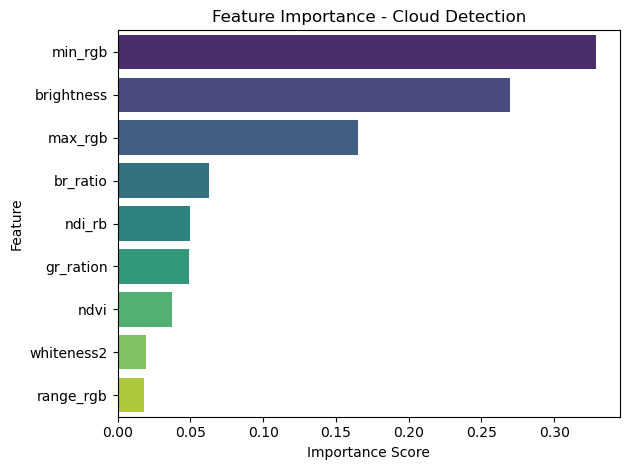

In [30]:
sns.barplot(x='Importance', y='Feature', data=ranking_df, palette='viridis')
plt.title("Feature Importance - Cloud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [31]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=3))



📊 Classification Report:
              precision    recall  f1-score   support

           1      0.939     0.984     0.961        63
           2      0.972     0.897     0.933        39

    accuracy                          0.951       102
   macro avg      0.956     0.941     0.947       102
weighted avg      0.952     0.951     0.951       102

